# Import packages

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.svm import SVC

from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    roc_curve, 
    auc, 
    ConfusionMatrixDisplay, 
    classification_report, 
    RocCurveDisplay)
from sklearn.preprocessing import LabelEncoder

In [2]:
plt.style.use("seaborn-v0_8")
plt.style.use("../presentation.mplstyle")

# Load dataset

In [3]:
data = pd.read_csv('/mnt/data/data/features/final_features.csv')

data.head()


,phage_id,bacteria_id,label,0,1,2,3,4,5,6,...,8054,8055,8056,8057,8058,8059,8060,8061,8062,8063
0,PQ850631,Escherichia coli,True,-0.000046,0.001024,0.000707,0.000812,0.000764,0.000735,0.000676,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1,PQ850631,Klebsiella pneumoniae,False,-0.000046,0.001024,0.000707,0.000812,0.000764,0.000735,0.000676,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
2,PQ850631,Pseudomonas aeruginosa,False,-0.000046,0.001024,0.000707,0.000812,0.000764,0.000735,0.000676,...,0.000003,0.000002,0.000003,0.000002,0.000002,0.000002,0.000003,0.000003,0.000003,3.209159e-07
3,PQ850631,Ralstonia solanacearum,False,-0.000046,0.001024,0.000707,0.000812,0.000764,0.000735,0.000676,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
4,PQ850631,Lactococcus lactis,False,-0.000046,0.001024,0.000707,0.000812,0.000764,0.000735,0.000676,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00


In [24]:
df_global_embeddings = data.iloc[:, 3:3+4199]

In [4]:
for bacteria in data["bacteria_id"].unique():
    n_interactions = data[data["bacteria_id"] == bacteria].query("label == True").shape[0]    
    print(bacteria, n_interactions)

Escherichia coli 98
Klebsiella pneumoniae 99
Pseudomonas aeruginosa 93
Ralstonia solanacearum 0
Lactococcus lactis 0
Staphylococcus aureus 88
Salmonella sp. 0
Acinetobacter baumannii 0
Streptococcus thermophilus 0


In [6]:
data_coli = data[data["phage_id"] == "PQ850631"]
data_coli["label"].value_counts()

label
False    8
True     1
Name: count, dtype: int64

In [7]:
phage_embedding_size = 3863
bacteria_embedding_size = 4199

## Format features and labels

In [9]:
data_interaction = data[data["label"]]

## Split datasets

In [33]:
X = data_interaction.iloc[:,3:phage_embedding_size]
y = data_interaction['bacteria_id']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [34]:
print(f"X_train shape : {X_train.shape}, X_test shape : {X_test.shape}")
print(f"y_train shape : {y_train.shape}, y_test shape : {y_test.shape}")

X_train shape : (302, 3860), X_test shape : (76, 3860)
y_train shape : (302,), y_test shape : (76,)


# Random Forest

In [13]:
clf = make_pipeline(StandardScaler(), RandomForestClassifier(max_depth=5, random_state=0))

clf.fit(X_train, y_train)

y_pred  = clf.predict(X_test)


## Get classification metrics

In [14]:
y_test.value_counts()

bacteria_id
Escherichia coli          20
Klebsiella pneumoniae     20
Pseudomonas aeruginosa    19
Staphylococcus aureus     17
Name: count, dtype: int64

In [15]:
y_train.value_counts()

bacteria_id
Klebsiella pneumoniae     79
Escherichia coli          78
Pseudomonas aeruginosa    74
Staphylococcus aureus     71
Name: count, dtype: int64

In [16]:
classes = y.unique()

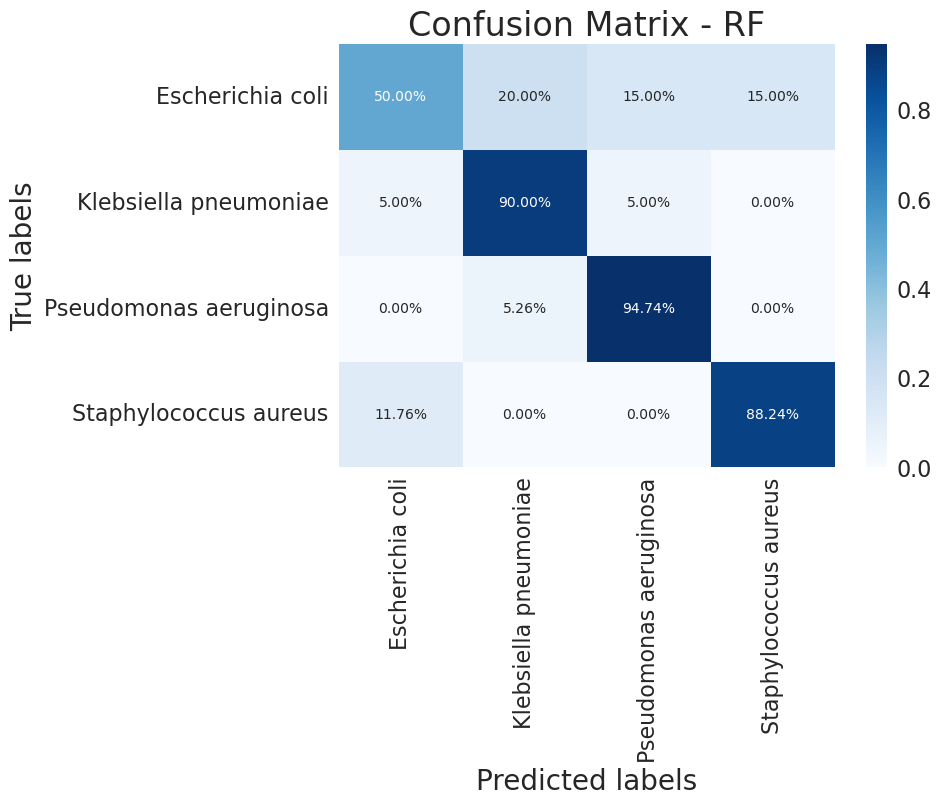

In [30]:
cm = confusion_matrix(y_test, y_pred)

cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True, fmt='.2%', xticklabels=classes, yticklabels=classes, cmap=plt.cm.Blues)
plt.title('Confusion Matrix - RF')
plt.xticks(rotation=90)
plt.ylabel("True labels")
plt.xlabel("Predicted labels")
plt.show()


In [18]:
print(classification_report(y_test, y_pred))

                        precision    recall  f1-score   support

      Escherichia coli       0.77      0.50      0.61        20
 Klebsiella pneumoniae       0.78      0.90      0.84        20
Pseudomonas aeruginosa       0.82      0.95      0.88        19
 Staphylococcus aureus       0.83      0.88      0.86        17

              accuracy                           0.80        76
             macro avg       0.80      0.81      0.79        76
          weighted avg       0.80      0.80      0.79        76



## SVM

In [19]:
clf_svm = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel="linear"))

clf_svm.fit(X_train, y_train)

y_pred = clf.predict(X_test)

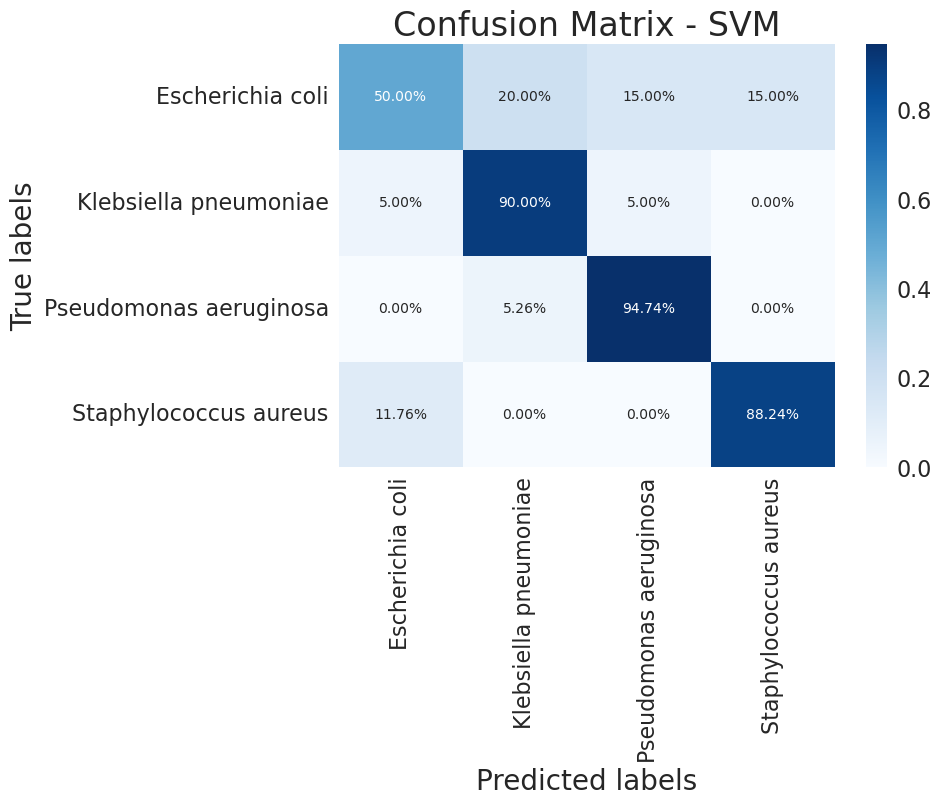

In [20]:
cm = confusion_matrix(y_test, y_pred)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
# disp.plot(cmap=plt.cm.Blues)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True, fmt='.2%', xticklabels=classes, yticklabels=classes, cmap=plt.cm.Blues)
plt.title('Confusion Matrix - SVM')
plt.xticks(rotation=90)
plt.ylabel("True labels")
plt.xlabel("Predicted labels")
plt.show()

In [21]:
print(classification_report(y_test, y_pred))

                        precision    recall  f1-score   support

      Escherichia coli       0.77      0.50      0.61        20
 Klebsiella pneumoniae       0.78      0.90      0.84        20
Pseudomonas aeruginosa       0.82      0.95      0.88        19
 Staphylococcus aureus       0.83      0.88      0.86        17

              accuracy                           0.80        76
             macro avg       0.80      0.81      0.79        76
          weighted avg       0.80      0.80      0.79        76



## XGBoost

In [221]:
class_to_number = { bacteria: i for i, bacteria in enumerate(classes) }

In [222]:
y_train_encoded = list(map(lambda cls: class_to_number[cls], y_train))
y_test_encoded = list(map(lambda cls: class_to_number[cls], y_test))

In [223]:
clf_xgb = make_pipeline(StandardScaler(), XGBClassifier(max_depth = 15, random_state=42))
# Fit the model, test sets are used for early stopping.
clf_xgb.fit(X_train, y_train_encoded)

y_pred = clf_xgb.predict(X_test)

In [224]:
number_to_class = { v: k for k, v in class_to_number.items() }

In [225]:
y_pred_decoded = list(map(lambda cls: number_to_class[cls], y_pred))

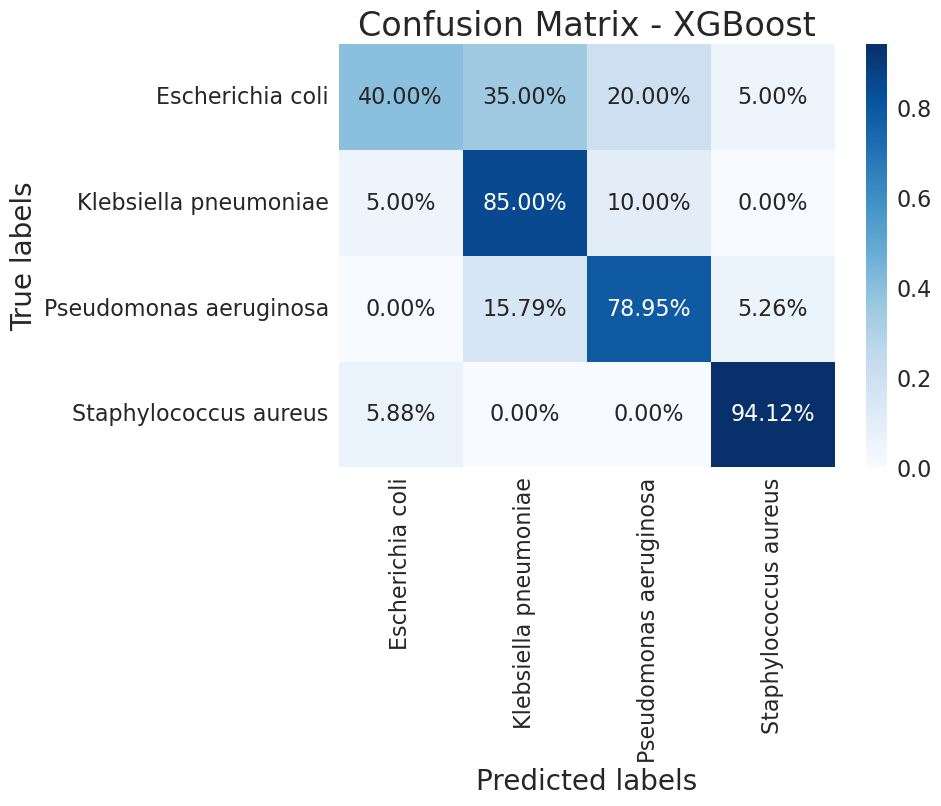

In [226]:
cm = confusion_matrix(y_test, y_pred_decoded)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
# disp.plot(cmap=plt.cm.Blues)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True, fmt='.2%', xticklabels=classes, yticklabels=classes, cmap=plt.cm.Blues)
plt.title('Confusion Matrix - XGBoost')
plt.xticks(rotation=90)
plt.ylabel("True labels")
plt.xlabel("Predicted labels")
plt.show()

## AdaBoost

In [228]:
clf_adb = make_pipeline(StandardScaler(), AdaBoostClassifier(n_estimators=100, random_state=42))

clf_adb.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(n_estimators=100, random_state=42))])

In [229]:
y_pred = clf_adb.predict(X_test)

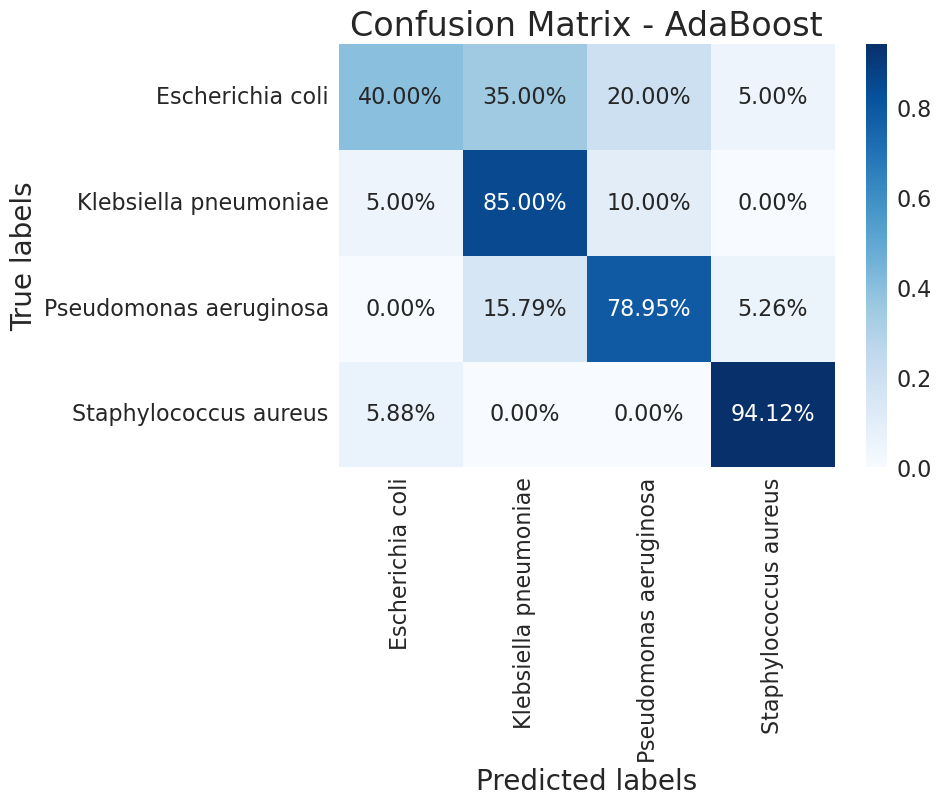

In [230]:
cm = confusion_matrix(y_test, y_pred_decoded)

cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True, fmt='.2%', xticklabels=classes, yticklabels=classes, cmap=plt.cm.Blues)
plt.title('Confusion Matrix - AdaBoost')
plt.xticks(rotation=90)
plt.ylabel("True labels")
plt.xlabel("Predicted labels")
plt.show()

## Silhouette plot

In [37]:
n_clusters = len(classes)

kmeans = KMeans(n_clusters=n_clusters, random_state=42)

sil_distrib =  silhouette_samples(X, y)

avg_sil = silhouette_score(X, kmeans.fit_predict(X))

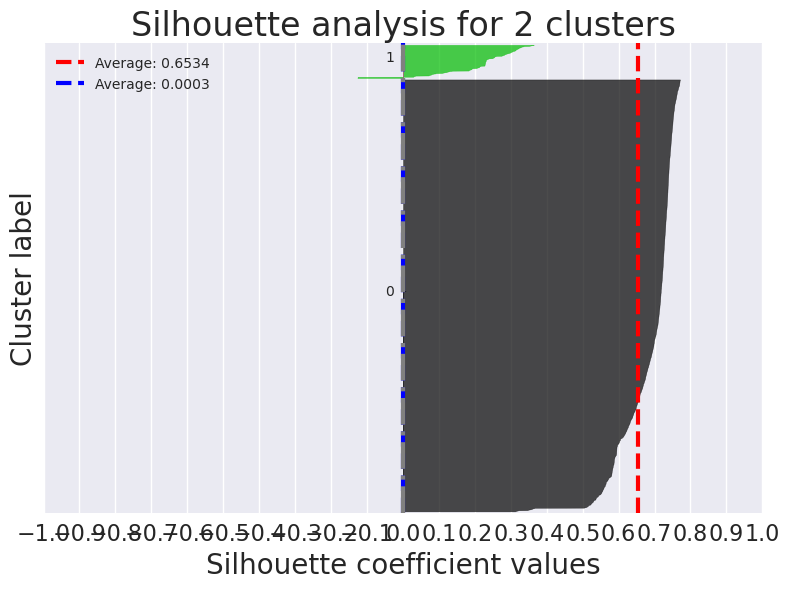

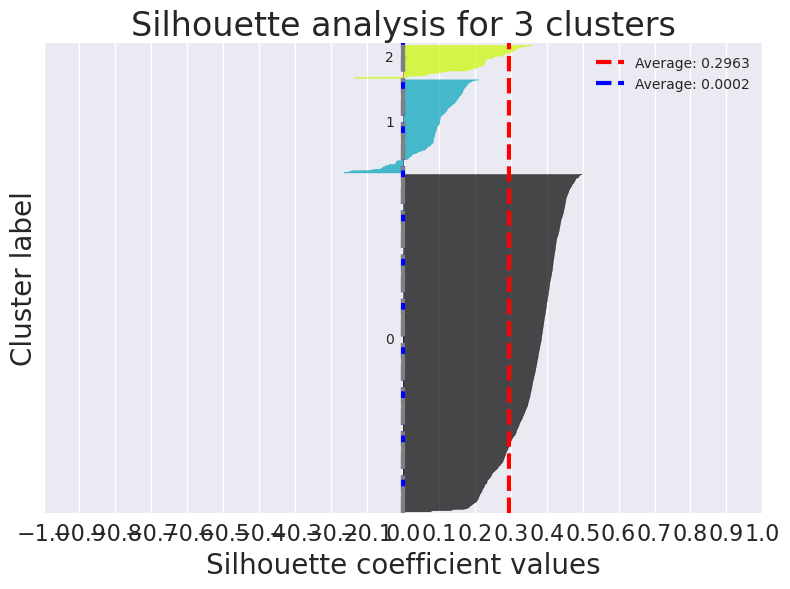

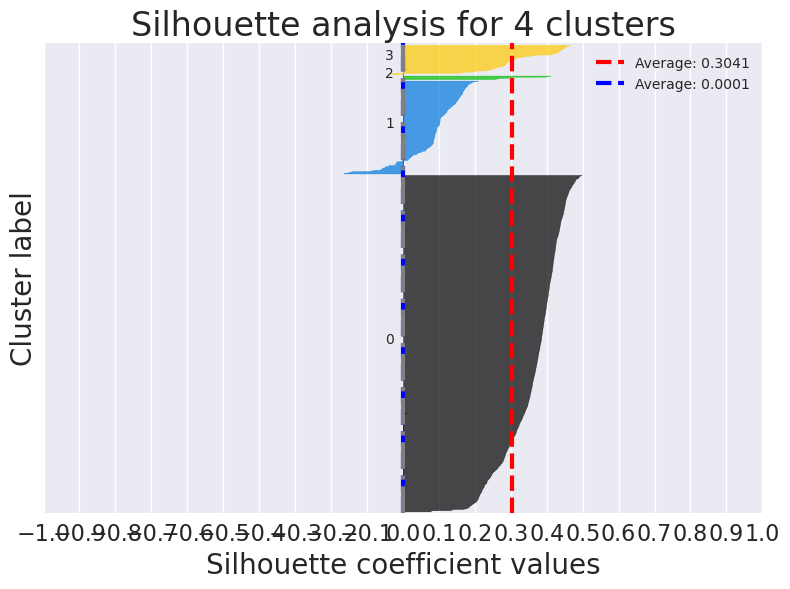

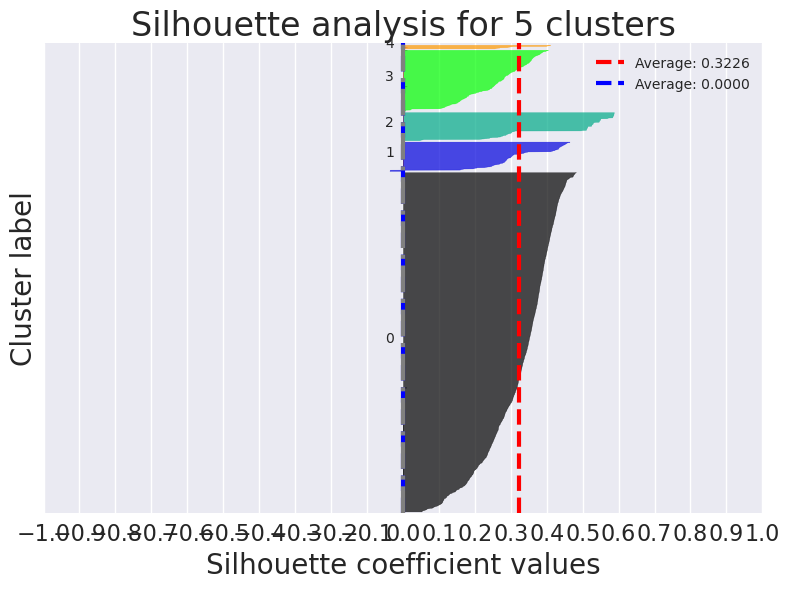

In [43]:
def plot_silhouette_analysis_from_embedding_df(df, n_clusters_range):
    """
    Performs silhouette analysis for a range of cluster numbers on a DataFrame
    where each column represents a dimension of the embedding vector.

    Args:
        df (pd.DataFrame): DataFrame where each column is an embedding dimension.
        n_clusters_range (list or range): List or range of the number of clusters to try.
    """

    embeddings = df.values
    random_embeddings = np.random.rand(*embeddings.shape)
    random_embeddings = 2 * np.random.rand(*embeddings.shape) - 1


    scaler = StandardScaler()
    scaled_embeddings = scaler.fit_transform(embeddings)

    for n_clusters in n_clusters_range:
        fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
        fig.set_size_inches(8, 6)

        # The 1st subplot is the silhouette plot
        ax1.set_xlim([-1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(scaled_embeddings) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters and a random generator
        # to get reproducible results on each run.
        clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
        cluster_labels = clusterer.fit_predict(scaled_embeddings)
        cluster_random_labels = clusterer.fit_predict(random_embeddings)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(scaled_embeddings, cluster_labels)
        random_silhouette_avg = silhouette_score(random_embeddings, cluster_random_labels)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(scaled_embeddings, cluster_labels)
        random_silhouette_values = silhouette_samples(random_embeddings, cluster_random_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            random_ith_cluster_silhouette_values = random_silhouette_values[cluster_random_labels == i]
            random_ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            size_cluster_i_random = random_ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            y_upper_random = y_lower + size_cluster_i_random

            color = plt.cm.nipy_spectral(float(i) / n_clusters)
            color_random = plt.cm.magma(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
            
            ax1.fill_betweenx(np.arange(y_lower, y_upper_random),
                              0, random_ith_cluster_silhouette_values,
                              facecolor=color_random, edgecolor=color_random, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the gap

        ax1.set_title(f"Silhouette analysis for {n_clusters} clusters")
        ax1.set_xlabel("Silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for the average silhouette score of all the samples
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"Average: {silhouette_avg:.4f}")
        ax1.axvline(x=random_silhouette_avg, color="blue", linestyle="--", label=f"Average: {random_silhouette_avg:.4f}")

        ax1.axvline(x=0, color="gray", linestyle="-.") # Indicate the 0 line
        ax1.legend()

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks(np.arange(-1, 1.1, 0.1))

        plt.tight_layout()
        plt.show()

    # Calculate the mean silhouette score across all samples for a chosen number of clusters
    # You might want to choose the 'best' number of clusters based on the plots
    best_n_clusters = n_clusters_range[0] # Or choose based on your analysis
    clusterer = KMeans(n_clusters=best_n_clusters, n_init=10, random_state=42)
    cluster_labels = clusterer.fit_predict(scaled_embeddings)
    mean_silhouette = silhouette_score(scaled_embeddings, cluster_labels)
    # print(f"\nMean silhouette score for {best_n_clusters} clusters: {mean_silhouette:.2f}")

    # You can also get the silhouette scores for each sample if needed
    sample_silhouette_values = silhouette_samples(scaled_embeddings, cluster_labels)
    return mean_silhouette, sample_silhouette_values



n_clusters_to_test = range(2, n_clusters+2) # Try 2, 3, and 4 clusters

# --- Perform silhouette analysis and plot the results ---
mean_silhouette_score, sample_silhouette_values = plot_silhouette_analysis_from_embedding_df(
    df_global_embeddings, n_clusters_to_test
)